In [157]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### 1. Creat an empty 8-bit 200*200 image

In [158]:
img_width, img_height = 200, 200
rect_width, rect_height = 90, 50
# Creat empty image
img = np.zeros((img_width, img_height), dtype=np.uint8)
# Fit in the rectangle
img[(img_height//2 - rect_height//2):(img_height//2 + rect_height//2), (img_width//2 - rect_width//2):(img_width//2 + rect_width//2)] = 255

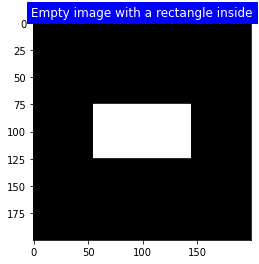

In [159]:
plt.title('Empty image with a rectangle inside', color='white', backgroundcolor='blue')
plt.imshow(img, cmap = 'gray')

### Apply affine transformations

#### Define translation function

In [160]:
def translation_func(img, x_trans, y_trans):
    # get the image shape
    rows, cols = img.shape
    # transformation matrix for translation
    M = np.float32([[1, 0, x_trans],
                    [0, 1, y_trans],
                    [0, 0, 1]])
    translated_img = cv2.warpPerspective(img, M, (cols, rows))
    return translated_img

#### Define rotation function

In [161]:
def rotation_func(img, _angle):
	# get the image shape
	rows, cols = img.shape
	#angle from degree to radian
	# angle = np.radians(_angle)
	#transformation matrix for Rotation
	image_center = tuple(np.array(img.shape[1::-1]) / 2)
	rot_mat = cv2.getRotationMatrix2D(image_center, _angle, 1.0)
	# apply a affine transformation to the image
	rotated_img = cv2.warpAffine(img, rot_mat, (int(cols),int(rows)))
	# rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
	return rotated_img

#### a. Translate image by 30 pixels in the opposite x direction

In [162]:
x_translated_image = translation_func(img, -30, 0)

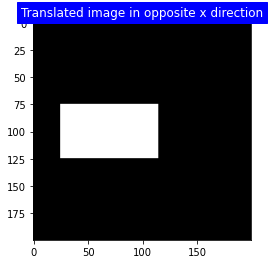

In [163]:
plt.title('Translated image in opposite x direction', color='white', backgroundcolor='blue')
plt.imshow(x_translated_image, cmap = 'gray')

#### b. Translate image by 20 pixels in the y direction

In [164]:
y_translated_image = translation_func(img, 0, 20)

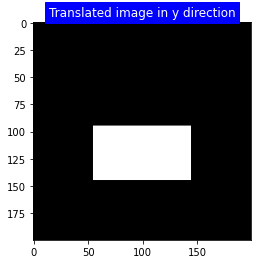

In [165]:
plt.title('Translated image in y direction', color='white', backgroundcolor='blue')
plt.imshow(y_translated_image, cmap = 'gray')

#### c. Rotate image by 40 degrees

In [166]:
rotated_40_image = rotation_func(img, -40)

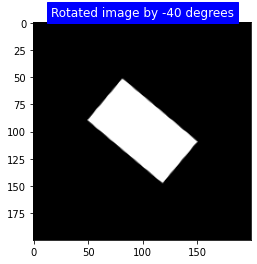

In [167]:
plt.title('Rotated image by -40 degrees', color='white', backgroundcolor='blue')
plt.imshow(rotated_40_image, cmap = 'gray')

#### d. Rotate image by -90 degrees

In [168]:
rotated_90_image = rotation_func(img, 90)

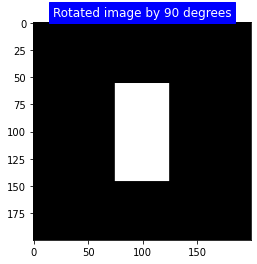

In [169]:
plt.title('Rotated image by 90 degrees', color='white', backgroundcolor='blue')
plt.imshow(rotated_90_image, cmap = 'gray')

### 3. Calculating the fourier transformation of the resulted images and plot them

In [170]:
def fourier_transform(img):
    _fft = np.fft.fft2(img)
    # shift zero-frequency component to the center  
    fourier_t_image = np.fft.fftshift(_fft)
    return fourier_t_image

In [171]:
def plot_fourier_t(img):
    # perform the fourier transformation
    fourier_t_image = fourier_transform(np.float64(img))

    # calculate log scaled magnitude of the image
    magnitude = np.abs(fourier_t_image)
    log_magnitude = np.log(magnitude + 1)

    # calculate the phase of the image
    phase = np.angle(fourier_t_image)

    # Plot
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(1, 4)

    # original image
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(img, cmap='gray')
    ax1.set_title('Original image', color='white', backgroundcolor='blue')

    # Fourier transform
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(magnitude, cmap='gray')
    ax2.set_title('Log scaled magnitude', color='white', backgroundcolor='blue')

    # Log scaled magnitude
    ax2 = fig.add_subplot(gs[0, 2])
    ax2.imshow(log_magnitude, cmap='gray')
    ax2.set_title('Log scaled magnitude', color='white', backgroundcolor='blue')

    # Phase
    ax2 = fig.add_subplot(gs[0, 3])
    ax2.imshow(phase, cmap='gray')
    ax2.set_title('Phase', color='white', backgroundcolor='blue')

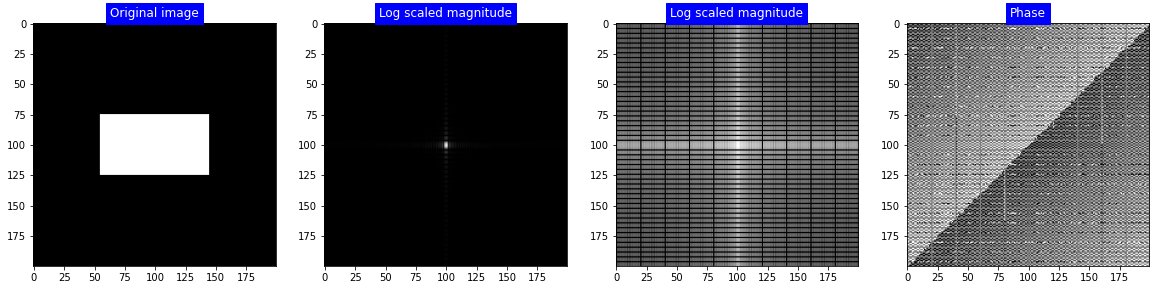

In [172]:
plot_fourier_t(img)

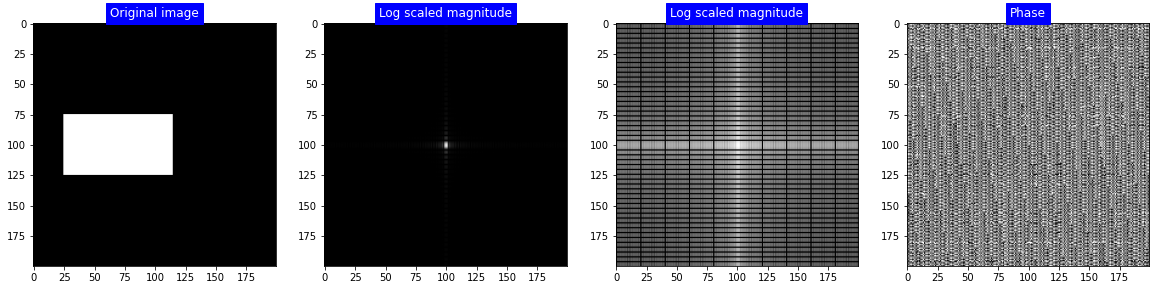

In [173]:
plot_fourier_t(x_translated_image)

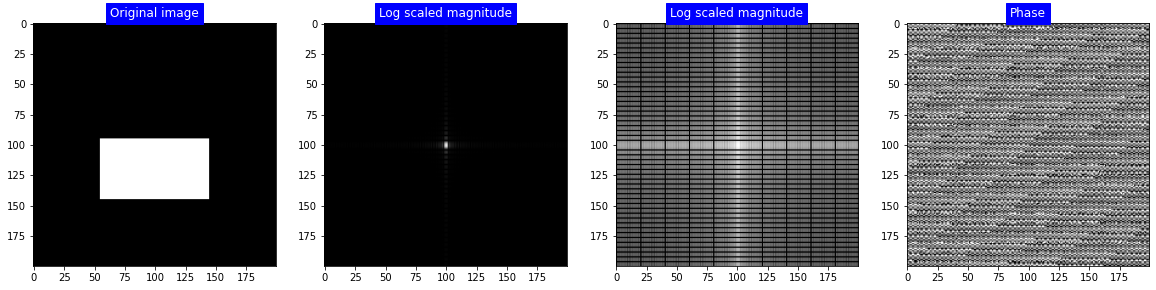

In [174]:
plot_fourier_t(y_translated_image)

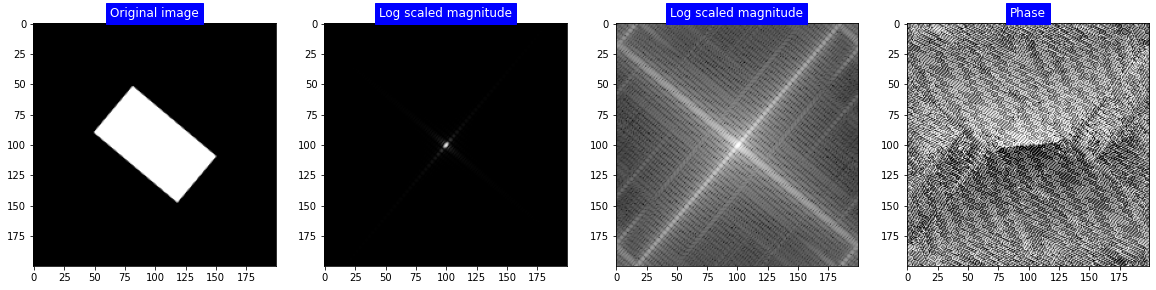

In [175]:
plot_fourier_t(rotated_40_image)

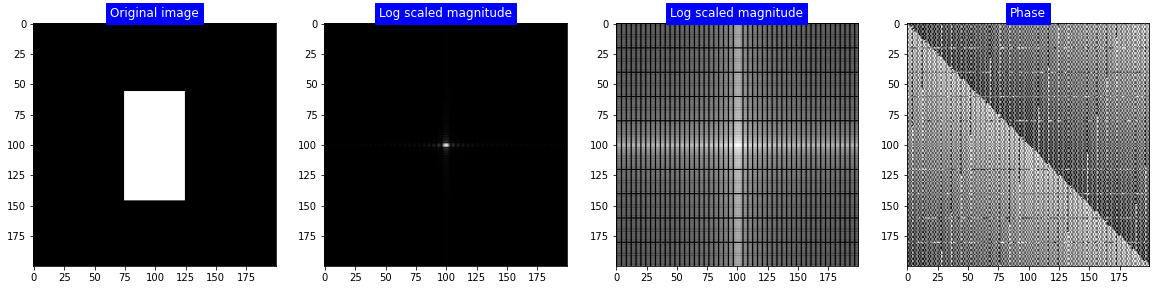

In [176]:
plot_fourier_t(rotated_90_image)